In [2]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

import os,sys

thismodule = sys.modules[__name__]

In [6]:
print('import sonde data')

inputdir = '/Users/bfildier/Data/EUREC4A/merged/sondes'

radiosondes = xr.open_dataset(os.path.join(inputdir,'all_radiosondes.nc'))
dropsondes = xr.open_dataset(os.path.join(inputdir,'all_dropsondes.nc'))


sst_source = 'ERA'
if sst_source == 'ERA':
    sst_all = xr.open_dataset('/Users/bfildier/Data/EUREC4A/ERA/SST_2020_01_02_ERA5_hourly_Barbados.nc')
    sst = sst_all.mean(dim='time')
else:
    sst = xr.open_dataset('../Input/SST_mean.nc')

import sonde data


/Users/bfildier/anaconda3/envs/pyLMD/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


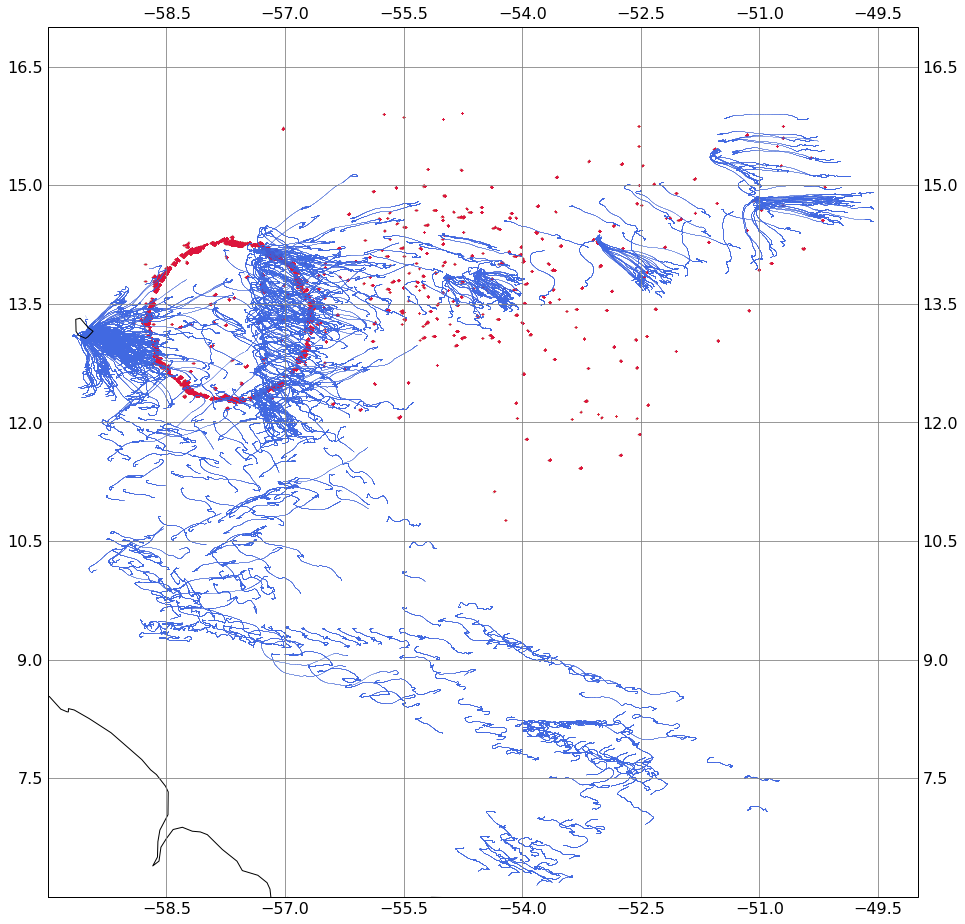

In [12]:
fig,ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()},figsize=(16,16))

ax.coastlines(resolution='50m')
ax.set_extent([-60,-49,6,17])
gl = ax.gridlines(color='Grey',draw_labels=True)
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}

x_ds,y_ds = dropsondes.lon.values.flatten(),dropsondes.lat.values.flatten()
x_rs,y_rs = radiosondes.lon.values.flatten(),radiosondes.lat.values.flatten()

dm = ax.scatter(x_ds,y_ds,marker='o',color='crimson',alpha=0.002,s=3,label='Dropsondes')
rm = ax.scatter(x_rs,y_rs,marker='o',color='royalblue',alpha=1,s=0.1,linewidths=0.01,label='Radiosondes')

# ax.legend(handles=[dm,rm],fontsize=18)

plt.savefig('../Figures/dropsondes_and_radiosondes.png',bbox_inches='tight')
plt.show() 

In [14]:
print('define color scale')
C_1 = np.loadtxt('../Input/cmap_1', usecols=range(4))
cm_manual_1 = mpl.colors.ListedColormap(C_1/255.0)


define color scale


In [48]:
print('define coordinates for map')

if sst_source == 'ERA':
    x_sst,y_sst = np.meshgrid(sst.longitude.values,sst.latitude.values)
else:
    x_sst,y_sst = np.meshgrid(sst.lon.values, sst.lat.values)
    
x_ds,y_ds = dropsondes.lon.values.flatten(),dropsondes.lat.values.flatten()
x_rs,y_rs = radiosondes.lon.values.flatten(),radiosondes.lat.values.flatten()

# x_ds,y_ds = dropsondes.sel(launch_time="2020-02-02").lon.values.flatten(),dropsondes.sel(launch_time="2020-02-02").lat.values.flatten()
# x_rs,y_rs = radiosondes.sel(launch_time="2020-02-02").lon.values.flatten(),radiosondes.sel(launch_time="2020-02-02").lat.values.flatten()

define coordinates for map


show sst and sondes


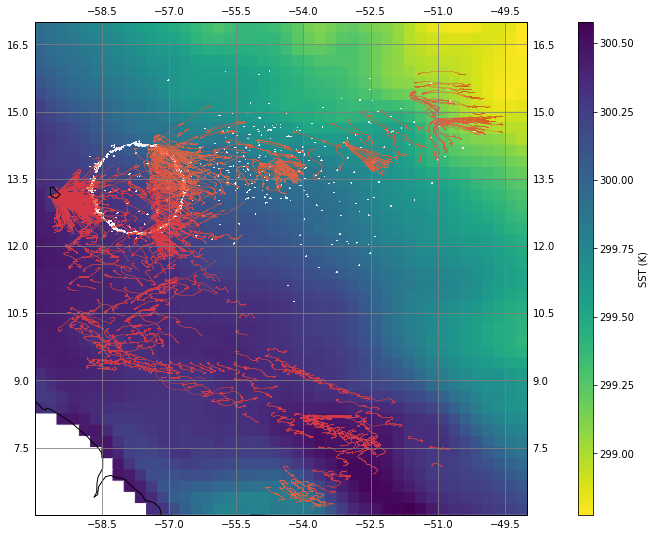

In [62]:
print('show sst and sondes')
# fig,ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()},figsize=(16,16))
fig,ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()},figsize=(10,10))
# plt.margins(x=0.1)

ax.coastlines(resolution='50m')
ax.set_extent([-60,-49,6,17])
gl = ax.gridlines(color='Grey',draw_labels=True)
# gl.xlabel_style = {'size': 16}
# gl.ylabel_style = {'size': 16}

# plot
sst_cmap = plt.cm.viridis_r
# sst_cmap = plt.cm.gist_earth_r
# sst_cmap = cm_manual_1
# alpha = 0.8
alpha = 1

if sst_source == 'ERA':
    sst_values = sst.sstk.values
else:
    sst_values = sst.SST.values

ssthm = ax.pcolormesh(x_sst,y_sst,sst_values,cmap=sst_cmap, alpha=alpha,edgecolors='face', antialiased=True, transform=ccrs.PlateCarree())

dm = ax.scatter(x_ds,y_ds,marker='o',color='white',alpha=0.1,s=1,linewidths=0.01,label='Dropsondes')
rm = ax.scatter(x_rs,y_rs,marker='o',color='tomato',alpha=0.03,s=1,linewidths=0.01,label='Radiosondes')

# dm = ax.scatter(x_ds,y_ds,marker='o',color='crimson',alpha=0.3,s=3,linewidths=0.01,label='Dropsondes')
# rm = ax.scatter(x_rs,y_rs,marker='o',color='mediumblue',alpha=0.3,s=0.3,linewidths=0.01,label='Radiosondes')


# ax.legend(handles=[dm,rm],fontsize=18)

# add colorbar
divider = make_axes_locatable(ax)
ax_cb = divider.new_horizontal(size="3%", pad=0.7, axes_class=plt.Axes)
fig.add_axes(ax_cb)
cbar = plt.colorbar(ssthm, cax=ax_cb)
# cbar.solids.set_edgecolor('none')
cbar.solids.set(alpha=1)


# Change alpha
fig.canvas.draw()
colors = ssthm.get_facecolor()
def alpha_to_white(color):
    white = np.array([1,1,1])
    alpha = color[-1]
    color = color[:-1]
    return alpha*color + (1 - alpha)*white
colors = np.array([alpha_to_white(color) for color in colors])
ssthm.set_facecolor(colors)


# adjust colorbar fontsize
# cbar.ax.tick_params(labelsize=16)
# cbar.ax.set_ylabel('SST (K)',fontsize=20)
cbar.ax.set_ylabel('SST (K)'
                  
                  )
# cbar.solids.set_edgecolor("face")

# Remove lat-lon labels from top and right
# ax.tick_params(direction='in',top='off')
# plt.tick_params(axis='both', labelsize=0, length = 0,top='off',right='off')
# ax.spines['right'].set_visible(False)

# axis labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# save
plt.savefig('../Figures/sst_dropsondes_and_radiosondes.png',bbox_inches='tight')
plt.show()